# Test Task for Data Science [Stirring Minds]

#### Name : Chaitanya Jindal
#### Date : 3<sup>rd</sup> September 2023

## Problem Statement

The file KAG_conversion_data.csv (found in the above link)  contains 1143 observations in 11 variables. This satisfies the constraint in our assignment having over a thousand observations with at least ten attributes.

### Business Questions

1. How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)

2. Finding the perfect target demographics with the appropriate click through rates

3. Understanding the ideal turnaround/decision making time per age group to convert and re-target future social campaigns

4. Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.


### Context

Cluster Analysis for Ad Conversions Data

### Data

The data used in this project is from an anonymous organisation’s social media ad campaign. The data file can be downloaded from here. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1. ad_id: an unique ID for each ad.

2. xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3. fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4. age: age of the person to whom the ad is shown.

5. gender: gender of the person to whim the add is shown

6. interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7. Impressions: the number of times the ad was shown.

8. Clicks: number of clicks on for that ad.

9. Spent: Amount paid by company xyz to Facebook, to show that ad.

10. Total conversion: Total number of people who enquired about the product after seeing the ad.

11. Approved conversion: Total number of people who bought the product after seeing the ad.

## Aim : To optimize Sales conversion and predict future sales

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv('KAG_conversion_data.csv')

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


### Checking Null Values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


### EDA

In [5]:
df.shape

(1143, 11)

In [6]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### Correlation Matrix

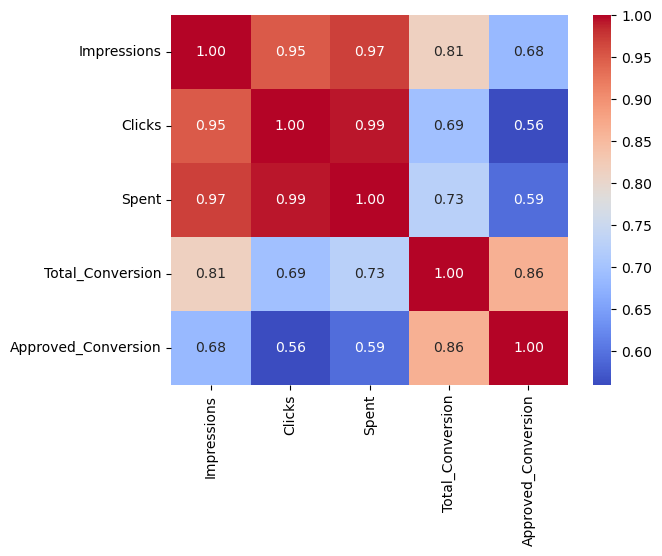

In [7]:
g = sns.heatmap(df[["Impressions", "Clicks", "Spent", "Total_Conversion", "Approved_Conversion"]].corr(), annot = True, fmt = ".2f", cmap="coolwarm")

#### Observation
"Approved_Conversion" is
<br>more related to ["Impressions", "Total_Conversion"] 
<br>than ["Clicks", "Spent"]

### Campaigns based distribution

In [8]:
df["xyz_campaign_id"].unique()

array([ 916,  936, 1178], dtype=int64)

#### Replacing Campaign ID

In [9]:
df["xyz_campaign_id"].replace({916 : "campaign_a", 936 : "campaign_b", 1178 : "campaign_c"}, inplace = True)

In [10]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_a,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_a,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_a,103920,30-34,M,20,693,0,0.00,1,0
3,708815,campaign_a,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,campaign_a,103928,30-34,M,28,4133,1,1.29,1,1


<Axes: xlabel='xyz_campaign_id', ylabel='count'>

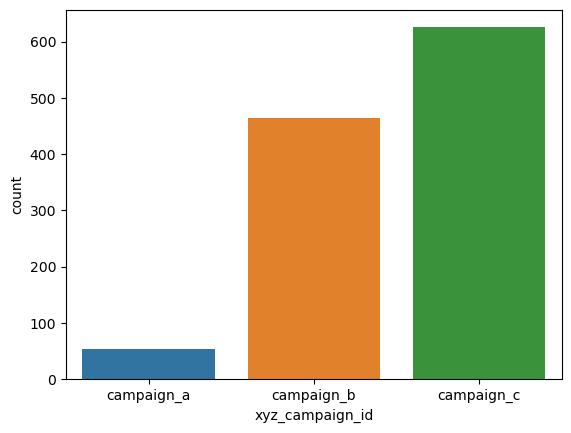

In [11]:
sns.countplot(x = 'xyz_campaign_id', data = df)

This shows Campaign_C has most number of ads

Text(0.5, 1.0, 'Campaign v/s Approved Conversions')

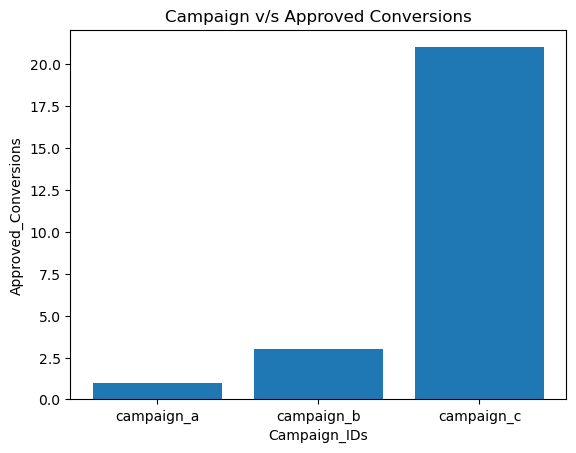

In [12]:
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.xlabel("Campaign_IDs")
plt.ylabel("Approved_Conversions")
plt.title("Campaign v/s Approved Conversions")

It also clears that Campaign_C has more number of Approved Conversions than other Campaigns

### Age based distribution

<Axes: xlabel='age', ylabel='count'>

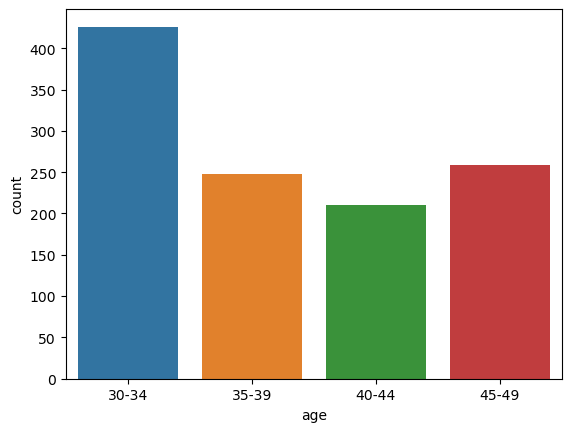

In [13]:
sns.countplot(x = 'age', data = df)

Text(0.5, 1.0, 'Campaign (AGE) v/s Approved Conversions')

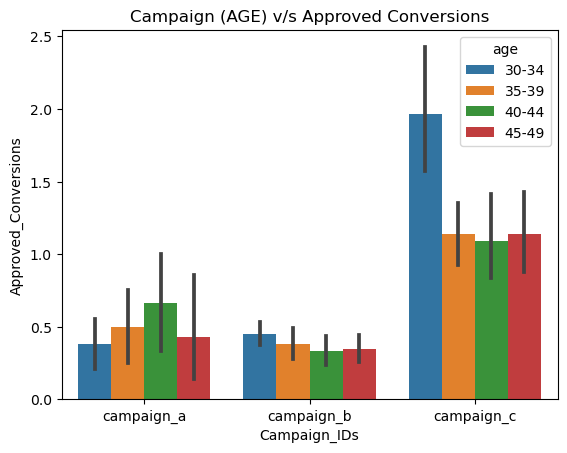

In [14]:
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue = df["age"])
plt.xlabel("Campaign_IDs")
plt.ylabel("Approved_Conversions")
plt.title("Campaign (AGE) v/s Approved Conversions")

Campaign_b and Campaign_c : 30-34 shows most interest
<br>Campaign_a : 40-44 shows most interest

### Gender based distribution

<Axes: xlabel='gender', ylabel='count'>

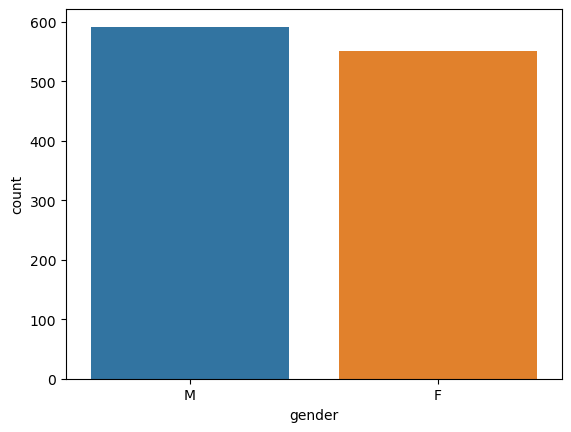

In [15]:
sns.countplot(x = 'gender', data = df)

Text(0.5, 1.0, 'Campaign (GENDER) v/s Approved Conversions')

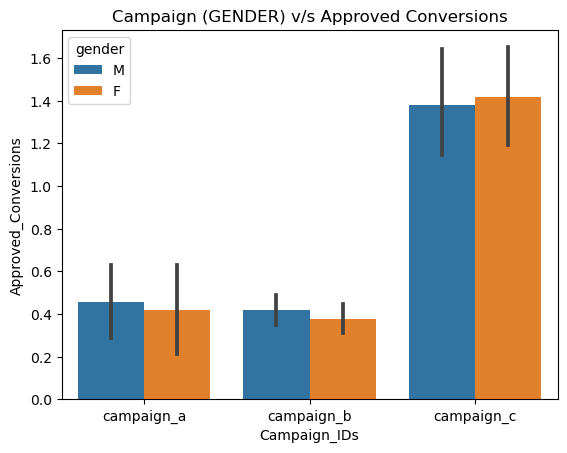

In [16]:
sns.barplot(x = df["xyz_campaign_id"], y = df["Approved_Conversion"], hue = df["gender"])
plt.xlabel("Campaign_IDs")
plt.ylabel("Approved_Conversions")
plt.title("Campaign (GENDER) v/s Approved Conversions")

Both Gender Shows Similar Interests

### Interest based distribution

<Axes: xlabel='interest', ylabel='count'>

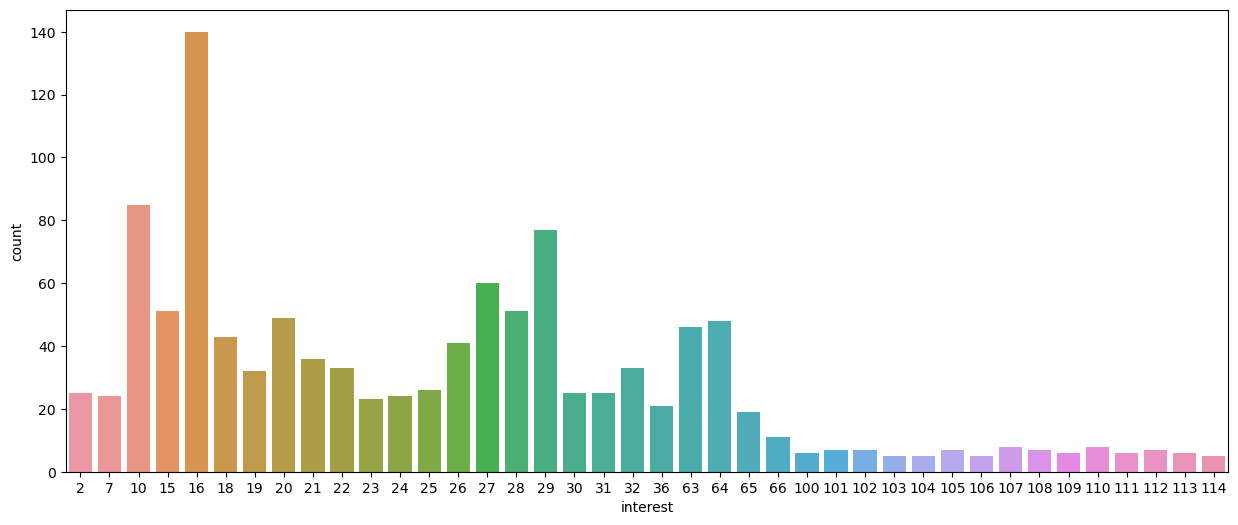

In [17]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize = fig_dims)
sns.countplot(x = 'interest', data = df)

Text(0, 0.5, 'Approved_Conversion')

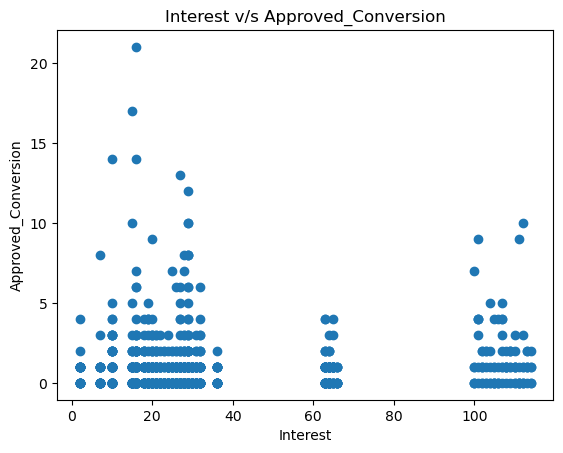

In [18]:
plt.scatter(df['interest'], df['Approved_Conversion'])
plt.title("Interest v/s Approved_Conversion")
plt.xlabel('Interest')
plt.ylabel('Approved_Conversion')

Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.

### Spent based distribution

Text(0, 0.5, 'Frequency')

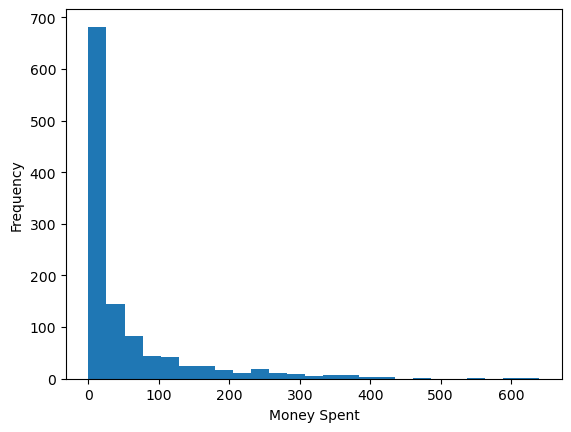

In [19]:
plt.hist(df["Spent"], bins = 25)
plt.xlabel("Money Spent")
plt.ylabel("Frequency")

Text(0, 0.5, 'Approved_Conversion')

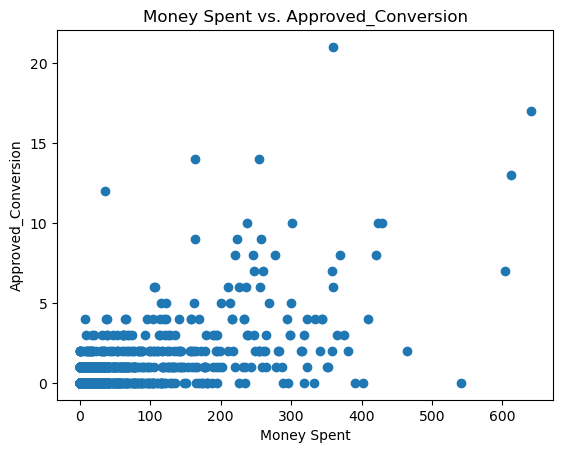

In [20]:
plt.scatter(df["Spent"], df["Approved_Conversion"])
plt.title("Money Spent vs. Approved_Conversion")
plt.xlabel("Money Spent")
plt.ylabel("Approved_Conversion")

It can be observed that, as the amount of money spent is increased, number of products bought increased

### Impressions based distribution

Text(0, 0.5, 'Frequency')

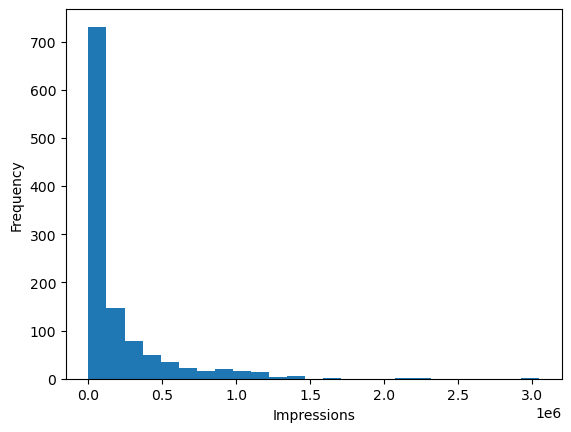

In [21]:
plt.hist(df['Impressions'], bins = 25)
plt.xlabel("Impressions")
plt.ylabel("Frequency")

Text(0, 0.5, 'Approved_Conversion')

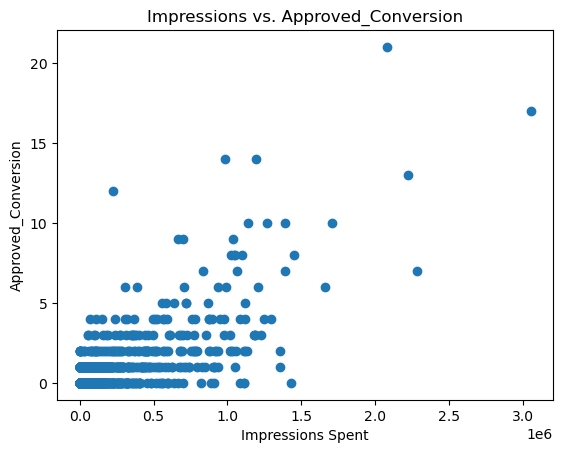

In [22]:
plt.scatter(df["Impressions"], df["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion")
plt.xlabel("Impressions Spent")
plt.ylabel("Approved_Conversion")

It can be observed that, there is a sudden rise in Approved_conversions after a certain point in Impressions

### People who actually bought the product

#### 1. After Clicking the ad

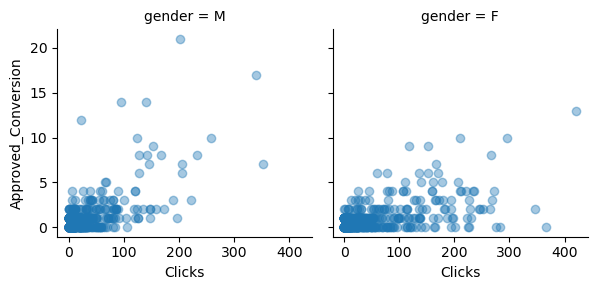

In [23]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend()

It seems men tend to click more than women but women buy more products than men after clicking the add.

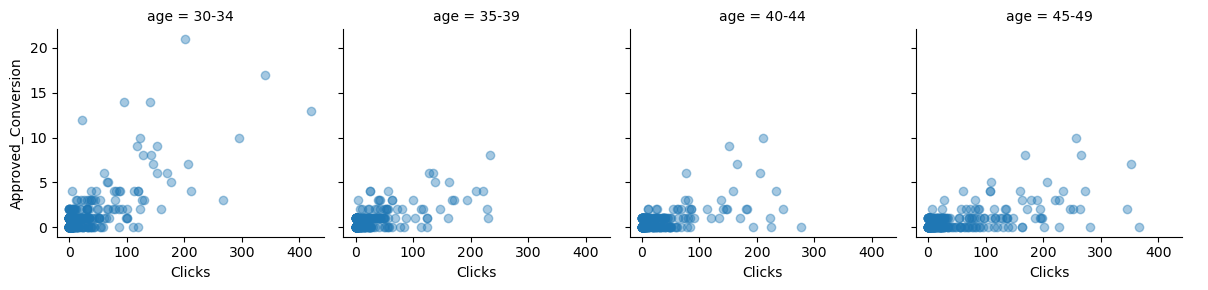

In [24]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

People in age group 30-34 has more tendency to buy product after clicking the add.

#### 2. After Enquiring the product

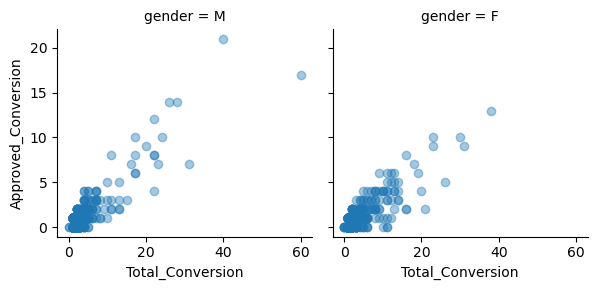

In [25]:
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend()

It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.

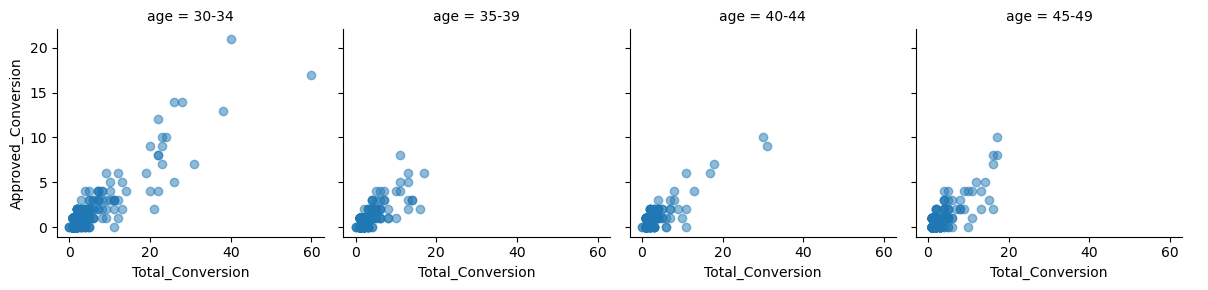

In [26]:
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.add_legend()

It seems people in age group 30-34 are more likely to buy the product after enquiring the product.

### Zooming into Campaign C

In [27]:
a=[]
b=[]
c=[]
for i,j,k in zip(df.xyz_campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="campaign_c":
      a.append(i),b.append(j),c.append(k)

In [28]:
d={'campaign_name':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_c=pd.DataFrame(d)
campaign_c.head()

,campaign_name,fb_campaign_id,Approved_Conversion
0,campaign_c,144531,14
1,campaign_c,144531,5
2,campaign_c,144531,1
3,campaign_c,144531,2
4,campaign_c,144531,2


### Distribution of fb_campaign_id with Approved_Conversion for campaign_c

Text(0, 0.5, 'Approved_Conversion')

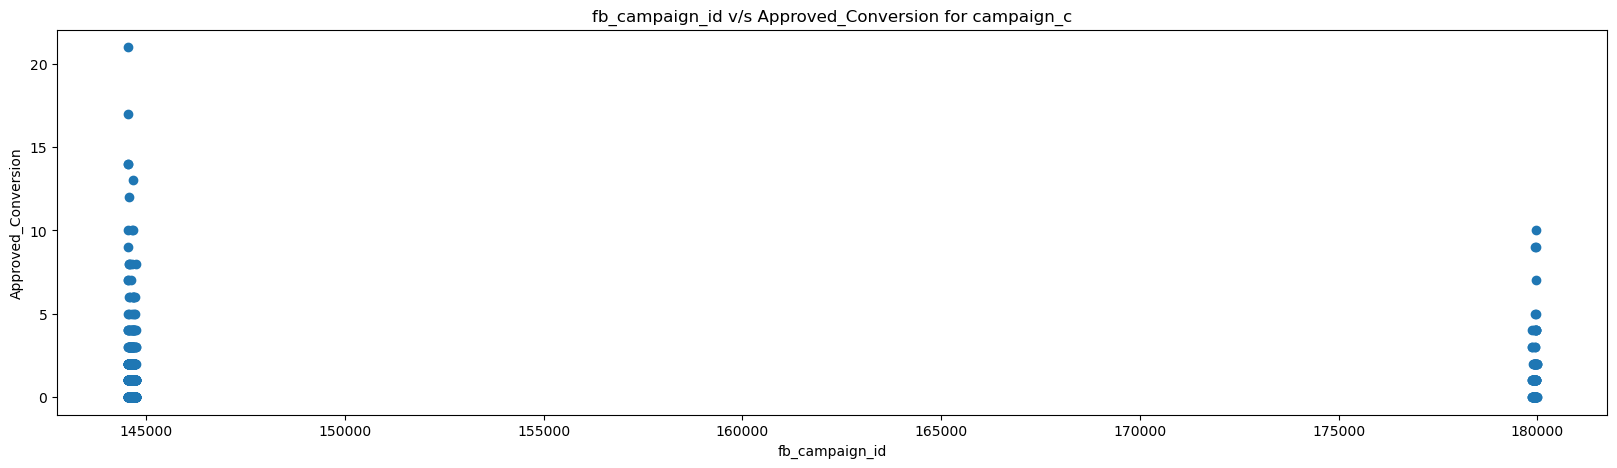

In [29]:
plt.figure(figsize=(20,5))
plt.scatter(campaign_c["fb_campaign_id"], campaign_c["Approved_Conversion"])
plt.title("fb_campaign_id v/s Approved_Conversion for campaign_c")
plt.xlabel("fb_campaign_id")
plt.ylabel("Approved_Conversion")

We can see fb_campaign_ids around 145000 have more Approved_Conversion than around 180000 for campaign_c

## Summary

### <li>campaign_a : 916</li>
### <li>campaign_b : 936</li>
### <li>campaign_c : 1178</li>

### Correlations :
"Approved_Conversion" is more related to ["Impressions", "Total_Conversion"] <br>than ["Clicks", "Spent"]

### Campaign_C:
<ol>
<li>campaign_c has most number of ads.</li>
<li>compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.</li>
</ol>

### Age_Group:
<ol>
<li>In campaign_c and campaign_b, the age group of 30-34 shows more interest, whereas in campaign_a the age group of 40-44 shows more interest.</li>
</ol>

### Campaign_C:
<ol>
<li>campaign_c has most number of ads.</li>
<li>compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.</li>
</ol>

### Gender:
<ol>
<li>Both the genders shows similar interests in all three campaigns.</li>
</ol>

### Interest:
<ol>
<li>Although the count of interest after 100 is less,there is a rise of users after 100 who actually bought the product. Rest of the distribution is according to what was expected.</li>
</ol>

### Money Spent:
<ol>
<li>campaign_c has most number of ads.</li>
<li>compaign_c has better Approved_conversion count, i.e. most people bought products in campaign_c.</li>
</ol>

### Product bought after clicking the ad:
<ol>
<li>It seems men tend to click more than women but women buy more products than men after clicking the add.</li>
<li>People in age group 30-34 has more tendency to buy product after clicking the add.</li>
</ol>

### Product bought after enquiring the ad:
<ol>
<li>It seems women buys more products than men after enquiring the product. However men tends to enquire more about the product.</li>
<li>It seems people in age group 30-34 are more likely to buy the product after enquiring the product.</li>
</ol>

### Instructive_conclusion:
<ol>
<li>For campaign_c, fb_campaign_ids around 145000 have more Approved_Conversion than around 180000</li>
</ol>

## Business Questions

<h3>1. How to optimize the social ad campaigns for the highest conversion rate possible? (Attain best Reach to Conversion ratios/Click to Conversion ratios)</h3>

Since highest conversion rate was attained in campaign_c, we can consider the factors contributed in this campaign:

<li>The number of ad counts should be more for better reach.

<li>The age group of 30-34 should be the main aim.

<li>People with interest types after 100 should be given more attention

<li>More the number of times the add is shown i.e. "impression", more approved_conversion rate is achieved.

<h3>2. Finding the perfect target demographics with the appropriate click through rates</h3>

<li>Women tend to buy the product more often after clicking the ad than men.
<li>Also the age group 30 to 34 buy the product more often after clicking the ad

<h3>3. Understanding the ideal turnaround/decision making time per age group to convert and re-target future social campaigns</h3>

<li>Age group 30-34 tend to take less decision making time followed by 35 to 39 and 40-44.
<li>Age group 45-49 take the most time to decide.

<h3>4. Comparing the individual campaign performance so the best creative/campaign can be run again with adjusted audiences.</h3>

<li>Clearly campaign_c wins the battle due to highest approved_conversion rate.
<li>Also campaign_a does pretty well , considering the number of ads it involves. With less no of ads, it has managed to peform better than campaign_b with large no of ads.